In [ ]:
# Script Python pour analyser les données
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger les données d'émissions
emissions = pd.read_xml(r"emissions.xml")
queue_data = pd.read_xml(r"queue_detector_output.xml")

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

# Charger et parser le fichier XML
tree = ET.parse("emissions.xml")
root = tree.getroot()

# Liste pour stocker les données
data = []

# Boucle sur chaque <timestep>
for timestep in root.findall("timestep"):
    time = float(timestep.attrib["time"])
    for vehicle in timestep.findall("vehicle"):
        co2 = float(vehicle.attrib.get("CO2", 0))
        data.append({"time": time, "CO2": co2})

# Créer un DataFrame pandas
emissions = pd.DataFrame(data)

# Affichage pour vérification
print(emissions.head(10))

   time       CO2
0   0.0   2624.72
1   1.0   4097.93
2   2.0   4925.05
3   3.0   4953.24
4   4.0   5828.38
5   5.0   6543.86
6   6.0   6193.30
7   7.0  10089.91
8   8.0   3039.55
9   9.0   5880.17


In [3]:
queue_data = pd.read_xml("queue_detector_output.xml")
queue_data["time"] = queue_data["begin"]
queue_data.rename(columns={"nVehContrib": "queue_length"}, inplace=True)
queue_data = queue_data[["time", "queue_length"]]

Corrélation entre la file d'attente et le CO₂ : 0.03


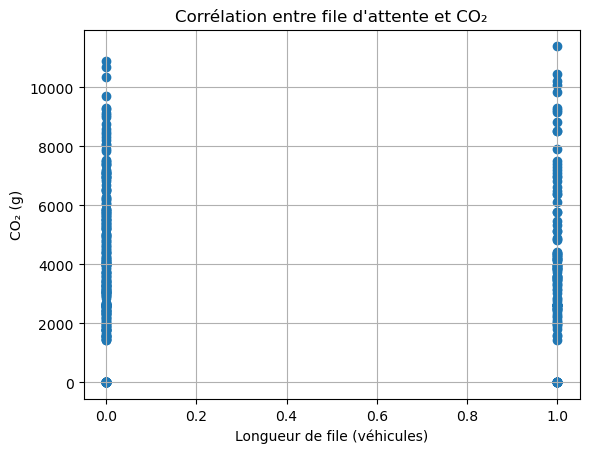

In [4]:
# Fusionner les deux DataFrames
data = pd.merge(emissions, queue_data, on="time")

# Analyse de corrélation
from scipy.stats import pearsonr
correlation, _ = pearsonr(data["queue_length"], data["CO2"])
print(f"Corrélation entre la file d'attente et le CO₂ : {correlation:.2f}")

# Visualisation
import matplotlib.pyplot as plt
plt.scatter(data["queue_length"], data["CO2"])
plt.xlabel("Longueur de file (véhicules)")
plt.ylabel("CO₂ (g)")
plt.title("Corrélation entre file d'attente et CO₂")
plt.grid(True)
plt.show()